In [42]:
# General imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# Scikit-learn imports for preprocessing and model evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, roc_curve, auc,
    precision_recall_curve
)
from sklearn.preprocessing import LabelBinarizer, label_binarize

# TensorFlow and Keras imports for model building and training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# TensorFlow Addons for additional optimizer options
import tensorflow_addons as tfa


In [43]:
train = pd.read_csv('dataset/sign_mnist.csv')
test = pd.read_csv('dataset/sign_mnist.csv')

In [44]:
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

In [45]:
labels = train['label'].values

#  Identificamos valores unicos y almacenamos en un arreglo de numpy
unique_val = np.array(labels)
np.unique(unique_val)
np.unique(unique_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int64),
 array([1126, 1010, 1144, 1196,  957, 1204, 1090, 1013, 1162, 1114, 1241,
        1055, 1151, 1196, 1088, 1279, 1294, 1199, 1186, 1161, 1082, 1225,
        1164, 1118], dtype=int64))

<Axes: ylabel='count'>

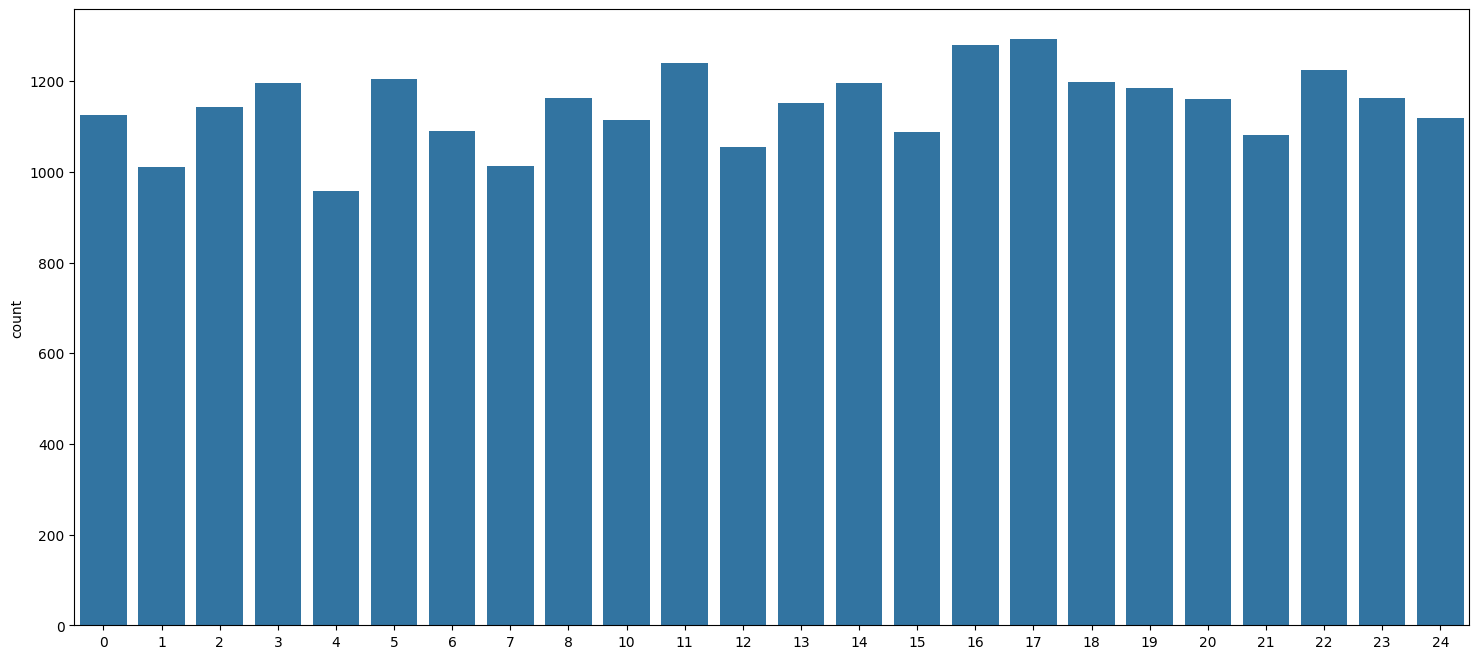

In [46]:
# Mostramos la cantidad de valores unicos, distribucion de clases
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [47]:
# El dataset contiene imágenes en forma de vectores lineales de 784 elementos. 
# Reforma temporalmente los vectores en matrices 28x28 

train.drop('label', axis = 1, inplace = True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

# Conviertimos estas etiquetas categóricas en un formato binario. One Hot encoding
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)


### Preparacion de datos

In [48]:
# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

# Configurar el tamaño del lote y el número de épocas para el entrenamiento
batch_size = 128
num_epochs = 100
num_classes = 24

kFolds = 10

# Normalizar los datos de entrenamiento y de prueba para escalar los valores de los píxeles entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar las imágenes para la entrada al modelo
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Learning rate y weight decay
learning_rate = 0.0001
weight_decay = 0.0001 # Tecnica de regularizacion para evitar overfitting, penaliza los pesos grandes


In [49]:
# Función para crear el modelo CNN
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.20),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [50]:
def run_experiment(model, x, y, num_epochs, batch_size, learning_rate, weight_decay, n_classes):
    # Convertir a numpy arrays si son tensores de TensorFlow
    if isinstance(x, tf.Tensor):
        x = x.numpy()
    if isinstance(y, tf.Tensor):
        y = y.numpy()

    skf = StratifiedKFold(kFolds, shuffle=True, random_state=42)
    fold_var = 1
    all_metrics = []
    average_losses_per_epoch = []  # Lista para almacenar las pérdidas medias por época
    
    for train_index, val_index in skf.split(x, np.argmax(y, axis=1)):
        print(f"Starting Fold {fold_var}")

        x_train_fold, x_val_fold = x[train_index], x[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        optimizer = tfa.optimizers.AdamW(
            learning_rate=learning_rate, weight_decay=weight_decay
        )
        current_learning_rate = optimizer.learning_rate.numpy()
        print(f"Current learning rate: {current_learning_rate}")
        
        model.compile(
            optimizer=optimizer,
            loss=keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=[
                keras.metrics.CategoricalAccuracy(name="accuracy"),
                keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
            ],
        )

        checkpoint_filepath = f"checkpoints/fold_{fold_var}"
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            checkpoint_filepath,
            monitor="val_accuracy",
            save_best_only=True,
            save_weights_only=True,
        )

        # Lista para almacenar las pérdidas por época
        losses_per_epoch = []

        accuracy = 0  # Asignar un valor predeterminado
        print(f"Starting Epoch {num_epochs}")
        for epoch in range(num_epochs):
            print(f"Epoch {epoch + 1}/{num_epochs}")

            # Training
            history_callback = model.fit(
                x=x_train_fold,
                y=y_train_fold,
                batch_size=batch_size,
                epochs=1,
                validation_data=(x_val_fold, y_val_fold),
                callbacks=[checkpoint_callback],
            )

            # Almacena la pérdida de la época actual
            losses_per_epoch.append(history_callback.history["loss"][0])

            # Imprime las métricas cada 50 épocas
            if (epoch + 1) % 50 == 0:
                _, accuracy, _ = model.evaluate(x_val_fold, y_val_fold, verbose=0)
                print(f"Metrics at Fold {fold_var}, Epoch {epoch + 1}: Accuracy={accuracy:.4f}")

        # Almacena la pérdida media por época para este fold
        average_loss = np.mean(losses_per_epoch)
        average_losses_per_epoch.append(average_loss)

        print(f"Training model in Fold {fold_var}...")

        print(f"Evaluating model on Fold {fold_var}...")
        model.load_weights(checkpoint_filepath)
        y_pred = model.predict(x_val_fold)
        y_true = y_val_fold

        # Asegúrate de que y_true es un arreglo unidimensional de etiquetas de clase
        # Si y_val_fold es one-hot encoded, convertirlo a etiquetas de clase
        y_true_classes = np.argmax(y_val_fold, axis=1) if y_val_fold.ndim > 1 else y_val_fold

        # Convierte las predicciones del modelo de probabilidades a etiquetas de clase
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Binarizar y_true para cálculo multiclase de AUC
        y_true_binarized = label_binarize(y_true_classes, classes=range(n_classes))

        # Calcula métricas adicionales usando las etiquetas de clase
        auc = roc_auc_score(y_true_binarized, y_pred, multi_class="ovr")
        precision = precision_score(y_true_classes, y_pred_classes, average='macro')
        recall = recall_score(y_true_classes, y_pred_classes, average='macro')
        f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
        mcc = matthews_corrcoef(y_true_classes, y_pred_classes)

        # Almacena las métricas y parámetros en la tabla
        metrics = {
            "fold": fold_var,
            "epoch": num_epochs,
            "learning_rate": learning_rate,  
            "accuracy": accuracy,
            "auc": auc,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "mcc": mcc,
        }
        all_metrics.append(metrics)

        print(f"Completed Fold {fold_var} with accuracy {accuracy}")

        fold_var += 1

    # Crea un DataFrame con las métricas y parámetros
    metrics_df = pd.DataFrame(all_metrics)
    best_model_metrics = metrics_df.loc[metrics_df['auc'].idxmax()]

    print("Average test accuracy across all folds:", metrics_df['accuracy'].mean())

    # Gráfica de la pérdida media por época
    plt.figure(figsize=(10, 6))
    plt.plot(average_losses_per_epoch, label='Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title('Average Loss per Epoch')
    plt.legend()
    plt.show()

    return metrics_df, best_model_metrics



Starting Fold 1
Current learning rate: 9.999999747378752e-05
Starting Epoch 100
Epoch 1/100


c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 4s 27ms/step - loss: 3.1708 - accuracy: 0.0659 - top-5-accuracy: 0.2755 - val_loss: 3.1535 - val_accuracy: 0.1134 - val_top-5-accuracy: 0.3512
Epoch 2/100
136/136 [==============================] - 4s 27ms/step - loss: 3.0707 - accuracy: 0.1151 - top-5-accuracy: 0.4040 - val_loss: 2.8864 - val_accuracy: 0.1561 - val_top-5-accuracy: 0.5754
Epoch 3/100
136/136 [==============================] - 3s 25ms/step - loss: 2.6713 - accuracy: 0.1970 - top-5-accuracy: 0.5997 - val_loss: 2.3865 - val_accuracy: 0.3132 - val_top-5-accuracy: 0.7732
Epoch 4/100
136/136 [==============================] - 3s 25ms/step - loss: 2.2642 - accuracy: 0.2865 - top-5-accuracy: 0.7419 - val_loss: 2.0079 - val_accuracy: 0.4277 - val_top-5-accuracy: 0.8502
Epoch 5/100
136/136 [==============================] - 3s 24ms/step - loss: 1.9809 - accuracy: 0.3667 - top-5-accuracy: 0.8199 - val_loss: 1.7647 - val_accuracy: 0.4729 - val_top-5-accuracy: 0.8892
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 5s 30ms/step - loss: 0.1628 - accuracy: 0.9692 - top-5-accuracy: 0.9999 - val_loss: 0.1054 - val_accuracy: 0.9912 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 4s 31ms/step - loss: 0.1592 - accuracy: 0.9707 - top-5-accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9906 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 4s 31ms/step - loss: 0.1611 - accuracy: 0.9694 - top-5-accuracy: 0.9998 - val_loss: 0.1010 - val_accuracy: 0.9896 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 4s 30ms/step - loss: 0.1561 - accuracy: 0.9705 - top-5-accuracy: 0.9998 - val_loss: 0.1054 - val_accuracy: 0.9891 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 4s 29ms/step - loss: 0.1530 - accuracy: 0.9719 - top-5-accuracy: 0.9999 - val_loss: 0.1031 - val_accuracy: 0.9906 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 11s 54ms/step - loss: 0.0962 - accuracy: 0.9882 - top-5-accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9995 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0948 - accuracy: 0.9891 - top-5-accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 5s 33ms/step - loss: 0.0899 - accuracy: 0.9900 - top-5-accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 0.9984 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 6s 45ms/step - loss: 0.0937 - accuracy: 0.9894 - top-5-accuracy: 0.9999 - val_loss: 0.0560 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 6s 43ms/step - loss: 0.0911 - accuracy: 0.9903 - top-5-accuracy: 0.9999 - val_loss: 0.0535 - val_accuracy: 0.9984 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 9s 47ms/step - loss: 0.0811 - accuracy: 0.9907 - top-5-accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 6s 42ms/step - loss: 0.0775 - accuracy: 0.9920 - top-5-accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0773 - accuracy: 0.9921 - top-5-accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 5s 40ms/step - loss: 0.0797 - accuracy: 0.9921 - top-5-accuracy: 0.9999 - val_loss: 0.0484 - val_accuracy: 0.9984 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 6s 42ms/step - loss: 0.0776 - accuracy: 0.9925 - top-5-accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9995 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 14s 60ms/step - loss: 0.0769 - accuracy: 0.9926 - top-5-accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9995 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 7s 48ms/step - loss: 0.0780 - accuracy: 0.9934 - top-5-accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9995 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 7s 49ms/step - loss: 0.0766 - accuracy: 0.9924 - top-5-accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 7s 50ms/step - loss: 0.0782 - accuracy: 0.9919 - top-5-accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 9s 68ms/step - loss: 0.0758 - accuracy: 0.9923 - top-5-accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 7s 36ms/step - loss: 0.0753 - accuracy: 0.9939 - top-5-accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9995 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 5s 39ms/step - loss: 0.0752 - accuracy: 0.9925 - top-5-accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9969 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 5s 37ms/step - loss: 0.0744 - accuracy: 0.9932 - top-5-accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9979 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 5s 38ms/step - loss: 0.0745 - accuracy: 0.9926 - top-5-accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 4s 31ms/step - loss: 0.0726 - accuracy: 0.9939 - top-5-accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9995 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 4s 25ms/step - loss: 0.0744 - accuracy: 0.9929 - top-5-accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 3s 25ms/step - loss: 0.0700 - accuracy: 0.9938 - top-5-accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 3s 24ms/step - loss: 0.0673 - accuracy: 0.9951 - top-5-accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 3s 25ms/step - loss: 0.0680 - accuracy: 0.9953 - top-5-accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 3s 25ms/step - loss: 0.0674 - accuracy: 0.9949 - top-5-accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9990 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 8s 40ms/step - loss: 0.0546 - accuracy: 0.9960 - top-5-accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 5s 34ms/step - loss: 0.0523 - accuracy: 0.9972 - top-5-accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 5s 39ms/step - loss: 0.0523 - accuracy: 0.9964 - top-5-accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 5s 35ms/step - loss: 0.0505 - accuracy: 0.9972 - top-5-accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 5s 37ms/step - loss: 0.0503 - accuracy: 0.9971 - top-5-accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 7s 41ms/step - loss: 0.0550 - accuracy: 0.9964 - top-5-accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 5s 38ms/step - loss: 0.0510 - accuracy: 0.9966 - top-5-accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 5s 40ms/step - loss: 0.0518 - accuracy: 0.9967 - top-5-accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 6s 44ms/step - loss: 0.0535 - accuracy: 0.9962 - top-5-accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 6s 45ms/step - loss: 0.0532 - accuracy: 0.9958 - top-5-accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

c:\Users\inigu\anaconda3\envs\py311\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 [==============================] - 9s 48ms/step - loss: 0.0521 - accuracy: 0.9969 - top-5-accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 2/100
136/136 [==============================] - 5s 36ms/step - loss: 0.0520 - accuracy: 0.9972 - top-5-accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 3/100
136/136 [==============================] - 5s 39ms/step - loss: 0.0561 - accuracy: 0.9951 - top-5-accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 4/100
136/136 [==============================] - 6s 41ms/step - loss: 0.0512 - accuracy: 0.9969 - top-5-accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 5/100
136/136 [==============================] - 6s 41ms/step - loss: 0.0521 - accuracy: 0.9966 - top-5-accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 6/100
136/136 [=

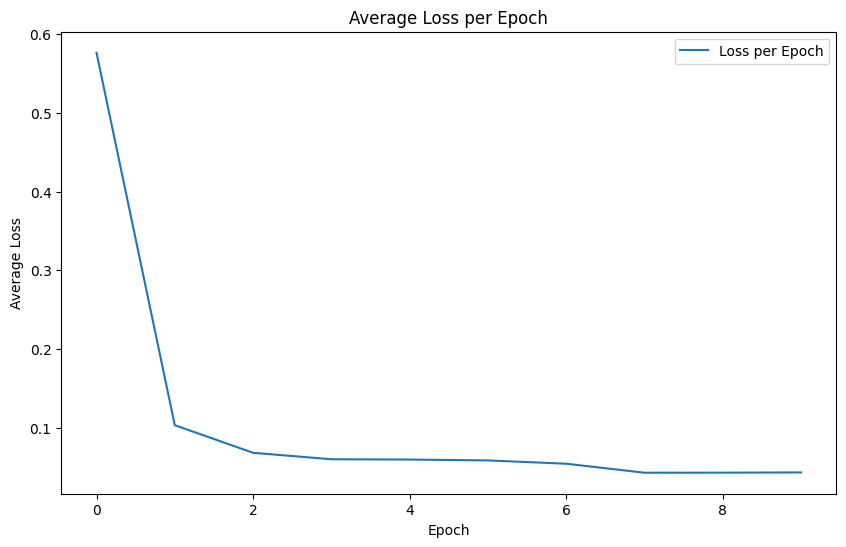

In [51]:
model = create_cnn_model((28, 28, 1), num_classes)
history, best_history = run_experiment(model, x_train, y_train, num_epochs, batch_size, learning_rate, weight_decay, num_classes)

In [52]:
# Configurar el formato de impresión
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar que las columnas se ajusten automáticamente
pd.set_option('display.float_format', '{:.4f}'.format)  # Formato de los números de punto flotante

# Imprimir los datos
print("All Metrics:")
print(history)

print("\nBest Model Metrics:")
print(best_history)


All Metrics:
   fold  epoch  learning_rate  accuracy    auc  precision  recall  f1_score    mcc
0     1    100         0.0001    0.9854 0.9999     0.9924  0.9923    0.9922 0.9919
1     2    100         0.0001    0.9995 1.0000     1.0000  1.0000    1.0000 1.0000
2     3    100         0.0001    1.0000 1.0000     1.0000  1.0000    1.0000 1.0000
3     4    100         0.0001    0.9995 1.0000     1.0000  1.0000    1.0000 1.0000
4     5    100         0.0001    1.0000 1.0000     1.0000  1.0000    1.0000 1.0000
5     6    100         0.0001    0.9995 1.0000     1.0000  1.0000    1.0000 1.0000
6     7    100         0.0001    0.9995 1.0000     1.0000  1.0000    1.0000 1.0000
7     8    100         0.0001    0.9995 1.0000     1.0000  1.0000    1.0000 1.0000
8     9    100         0.0001    1.0000 1.0000     1.0000  1.0000    1.0000 1.0000
9    10    100         0.0001    1.0000 1.0000     1.0000  1.0000    1.0000 1.0000

Best Model Metrics:
fold              3.0000
epoch           100.0000
lea

In [53]:
best_auc_model = history.loc[history['auc'].idxmax()]
best_model_path = f"checkpoints/fold_{int(best_auc_model['fold'])}"  # Convertir el número de fold a entero


print(best_auc_model)
print(best_model_path)


fold              3.0000
epoch           100.0000
learning_rate     0.0001
accuracy          1.0000
auc               1.0000
precision         1.0000
recall            1.0000
f1_score          1.0000
mcc               1.0000
Name: 2, dtype: float64
checkpoints/fold_3


In [54]:
best_model = create_cnn_model((28, 28, 1), num_classes)
best_model.load_weights(best_model_path)
best_model.save('mi_modelo2.keras')

258/258 [==============================] - 3s 10ms/step


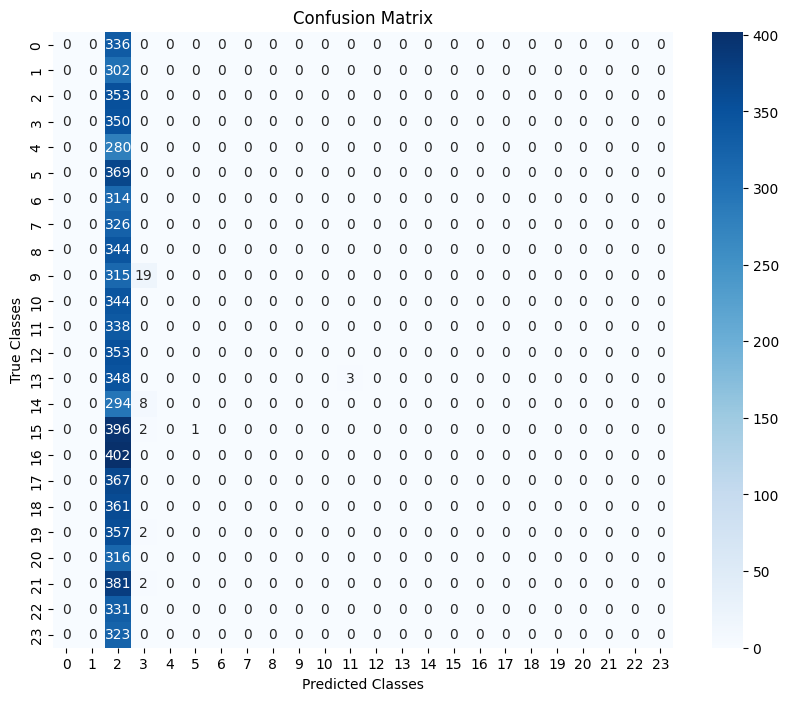

In [55]:
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to integer class labels
y_test_classes = np.argmax(y_test, axis=1)

# Now, create the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()



258/258 [==============================] - 2s 9ms/step


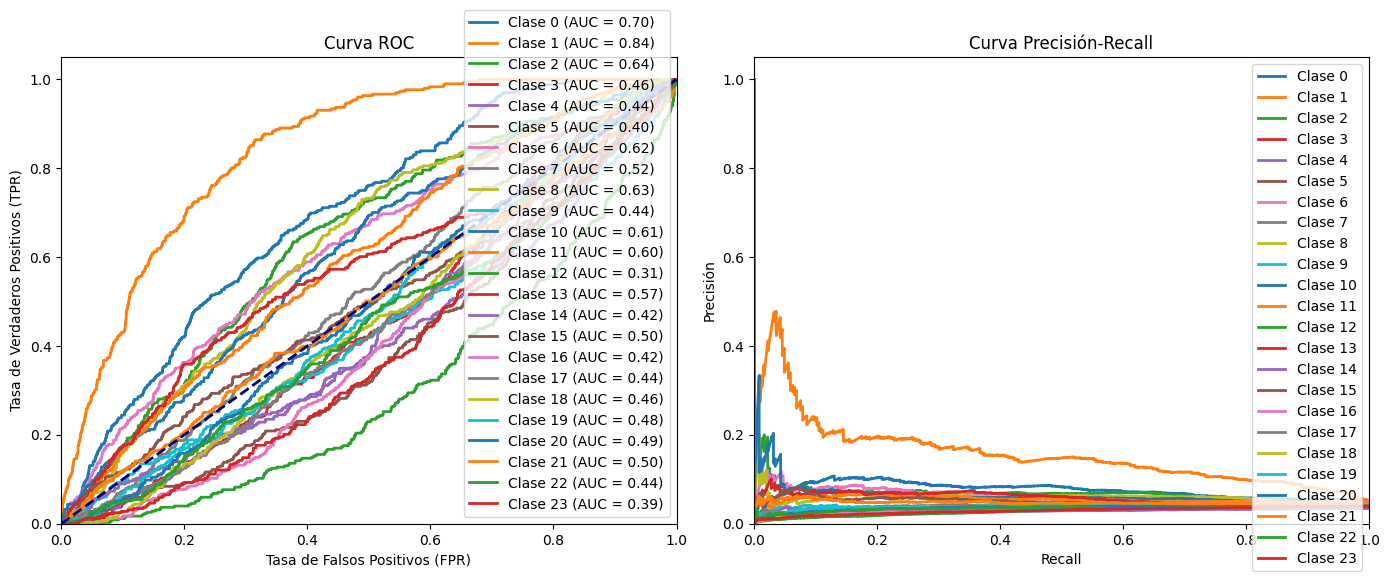

In [56]:
# Obtener las probabilidades de predicción del modelo en el conjunto de prueba
y_test_probs = best_model.predict(x_test)

# Binarizar las etiquetas verdaderas para cálculo multiclase de AUC
y_test_binarized = label_binarize(y_test, classes=range(num_classes))

# Inicializar la figura para los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot AUC-ROC
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_probs[:, i])
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[0].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[0].set_title('Curva ROC')
axes[0].legend(loc="lower right")

# Plot Precisión vs. Recall
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_probs[:, i])
    axes[1].plot(recall, precision, lw=2, label=f'Clase {i}')

axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precisión')
axes[1].set_title('Curva Precisión-Recall')
axes[1].legend(loc="upper right")
plt.tight_layout()
plt.show()

In [58]:
import cv2
import numpy as np
from keras.models import load_model


# Crear un diccionario para mapear índices numéricos a letras
alphabet = 'ABCDEFGHIKLMNOPQRSTUVWXY'  # Excluye J y Z
index_to_letter = {i: alphabet[i] for i in range(len(alphabet))}

# Carga tu modelo entrenado
#modelCV = load_model('mi_modelo.keras', custom_objects={'Patches': Patches})
modelCV = load_model('mi_modelo2.keras')

# Inicia la captura de video
cap = cv2.VideoCapture(0)

# Inicializa la variable para la letra predicha y la imagen capturada
predicted_letter = None
captured_frame = None

while True:
    # Captura fotograma a fotograma
    ret, frame = cap.read()
    if not ret:
        break

    # Si hay una imagen capturada, utiliza esa imagen en lugar del fotograma en vivo
    if captured_frame is not None:
        frame = captured_frame

    # Si hay una letra predicha, muestra el resultado como texto en la ventana
    if predicted_letter is not None:
        cv2.putText(frame, f"Letra Predicha: {predicted_letter}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Opcional: muestra la imagen en una ventana
    cv2.imshow('Video', frame)

    # Espera la entrada del usuario
    key = cv2.waitKey(1) & 0xFF

    # Si se presiona 'c', captura el fotograma actual
    if key == ord('c'):
        captured_frame = frame.copy()
        processed_frame = cv2.cvtColor(captured_frame, cv2.COLOR_BGR2GRAY)
        processed_frame = cv2.resize(processed_frame, (28, 28))
        processed_frame = processed_frame.astype('float32') / 255
        processed_frame = np.reshape(processed_frame, (1, 28, 28, 1))
        prediction = modelCV.predict(processed_frame)
        letter_index = np.argmax(prediction)
        predicted_letter = index_to_letter[letter_index]
        print("Letra Predicha:", predicted_letter)

    # Si se presiona 'r', reinicia el proceso
    elif key == ord('r'):
        predicted_letter = None
        captured_frame = None

    # Salir con 'q'
    elif key == ord('q'):
        break

# Libera la cámara y cierra las ventanas abiertas
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 98ms/step
Letra Predicha: C
1/1 [==============================] - 0s 59ms/step
Letra Predicha: C
1/1 [==============================] - 0s 45ms/step
Letra Predicha: C
1/1 [==============================] - 0s 50ms/step
Letra Predicha: C
1/1 [==============================] - 0s 45ms/step
Letra Predicha: C
1/1 [==============================] - 0s 31ms/step
Letra Predicha: C
